<b> Ridge and Lasso Regularizations are used to normalize overfitting model ---- To make model less bias and less varience

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Melbourne Housing Price

In [2]:
df1=pd.read_csv('Melbourne_housing_FULL.csv')
df1.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
df1.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [4]:
df1.shape

(34857, 21)

In [5]:
cols_to_use=['Suburb','Rooms','Type','Method','SellerG','Regionname','Propertycount','Distance','CouncilArea','Bedroom2','Bathroom','Car','Landsize','BuildingArea','Price']
df2=df1[cols_to_use]
df2.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [6]:
df2.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

## Handling Missing Values

In [7]:
cols_to_fill_zero=['Propertycount','Distance','Bathroom','Bedroom2','Car']
df2[cols_to_fill_zero]=df2[cols_to_fill_zero].fillna(0)
df2.isnull().sum()

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [8]:
df2['Landsize']=df2['Landsize'].fillna(df2.Landsize.mean())
df2['BuildingArea']=df2['BuildingArea'].fillna(df2.BuildingArea.mean())
df2.isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1656\183526188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Landsize']=df2['Landsize'].fillna(df2.Landsize.mean())
C:\Users\Admin\AppData\Local\Temp\ipykernel_1656\183526188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BuildingArea']=df2['BuildingArea'].fillna(df2.BuildingArea.mean())


Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

In [9]:
df2.dropna(inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1656\1761232742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


In [10]:
df2.isnull().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

## One Hot Encoding

In [11]:
df3=pd.get_dummies(df2,drop_first=True)
df3.head(5)

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,0,...,0,0,0,0,0,0,0,0,1,0
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,0,...,0,0,0,0,0,0,0,0,1,0
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,0,...,0,0,0,0,0,0,0,0,1,0


## Model Building

In [12]:
X=df3.drop(['Price'],axis=1)
y=df3.Price

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2) 

### 1 - Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
def rmse(y_test, y_pred):
  return np.sqrt(mean_squared_error(y_test, y_pred))

In [16]:
lr_rmse = rmse(y_test, lr.predict(X_test))
lr_score=lr.score(X_test,y_test)
lr_score, lr_rmse

(0.13853683161537644, 585043.1369601301)

### 2 - Lasso Regression / L1 Regularization

In [17]:
from sklearn.linear_model import Lasso

lr_lasso = Lasso()
lr_lasso.fit(X_train, y_train)
lr_lasso_score=lr_lasso.score(X_test, y_test) 
lr_lasso_rmse = rmse(y_test, lr_lasso.predict(X_test))
lr_lasso_score, lr_lasso_rmse

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.265e+15, tolerance: 7.963e+11
  model = cd_fast.enet_coordinate_descent(


(0.15699328631539478, 578742.0639039526)

### 3 - Ridge Regression / L2 Regularization

In [18]:
from sklearn.linear_model import Ridge

lr_ridge = Ridge()
lr_ridge.fit(X_train, y_train)
lr_ridge_score=lr_ridge.score(X_test, y_test) 
lr_ridge_rmse = rmse(y_test, lr_ridge.predict(X_test))
lr_ridge_score, lr_ridge_rmse

(0.6701765758295284, 362001.42501260305)

----

## Boston Housing Price

In [19]:
from sklearn.datasets import load_boston

In [20]:
df= load_boston()

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

In [21]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [22]:
house_price_dataframe=pd.DataFrame(df.data,columns=df.feature_names)
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
house_price_dataframe['price']=df.target
df1=house_price_dataframe.copy()
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Model Building

### 1 - Linear Regression

In [24]:
X=df1.iloc[:,:-1]  # independent features
y=df1.iloc[:,-1]   # dependent features

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lr_reg=LinearRegression()
mse=cross_val_score(lr_reg,X,y,scoring='neg_mean_squared_error',cv=5)   #Splitting data into number of subsets and then training model with each subset and finding accuracy of model in case of each subset. After that finding mean of accuracies. neg_mean_squared_error value should be near to zero, cv=5 means splitting data into 5 subsets.
mean_mse=np.mean(mse)  #finding mean of accuracies
print(mean_mse)

-37.13180746769895


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

<b> Model building by Lasso is most generalized than that of Ridge

### 2 - Ridge Regression

In [49]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV  # For Hyperparameter tuning--- to find optimal values for model building

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_reg1=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)  #estimator means model name,
ridge_reg1.fit(X,y)
print(ridge_reg1.best_params_)
print(ridge_reg1.best_score_)

{'alpha': 100}
-29.905701947540308


In [50]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_reg2=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)  #estimator means model name,
ridge_reg2.fit(X_train,y_train)
print(ridge_reg2.best_params_)
print(ridge_reg2.best_score_)

{'alpha': 0.01}
-22.99980610574054


### 3 - Lasso Regression

In [51]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV #for cross validation

lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}    #For lambda used in formula, we use alpha here (>=0).If alpha is 0 then problem is simple linear regression. If alpha is greater than 0 then problem is ridge regression
lasso_reg1=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_reg1.fit(X,y)
print(lasso_reg1.best_params_)
print(lasso_reg1.best_score_)

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.431e+03, tolerance: 3.919e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.397e+03, tolerance: 3.307e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

{'alpha': 1}
-35.53158022069486


In [54]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}    #For lambda used in formula, we use alpha here (>=0).If alpha is 0 then problem is simple linear regression. If alpha is greater than 0 then problem is ridge regression
lasso_reg2=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_reg2.fit(X_train,y_train)
print(lasso_reg2.best_params_)
print(lasso_reg2.best_score_)

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.756e+03, tolerance: 2.488e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.655e+03, tolerance: 2.586e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

{'alpha': 1e-15}
-23.000986361909334


C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.409e+03, tolerance: 3.001e+00
  model = cd_fast.enet_coordinate_descent(


In [55]:
ridge_pred=ridge_reg2.predict(X_test)
lasso_pred=lasso_reg2.predict(X_test)

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

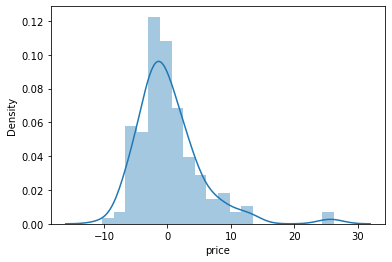

In [56]:
import seaborn as sns
sns.distplot(y_test-lasso_pred) # to see variance

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

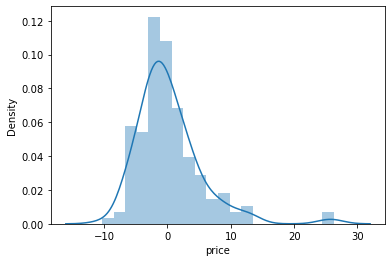

In [57]:
import seaborn as sns
sns.distplot(y_test-ridge_pred)

In [58]:
from sklearn.metrics import r2_score
score=r2_score(ridge_pred,y_test)
score

0.5288979006015855

In [59]:
from sklearn.metrics import r2_score
score=r2_score(lasso_pred,y_test)
score

0.5291006947760477